<a href="https://colab.research.google.com/github/JinyongShin/TensorFlow/blob/main/05_1_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Classification (Regression) - Eager Execution

Logistic Classification 은 True or False 와 같은 Binary나 복수개의 다항 분류에 쓰입니다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
tf.__version__

'2.4.1'

In [3]:
tf.random.set_seed(777) # For reproducibility

x_data --> 2차원 배열 --> 2차원 공간에 표현하여 x1 과 x2를 기준으로 y_data를 0과 1로 구분하는 예제

In [4]:
x_train = [[1. , 2. ] ,
           [2. , 3.] ,
           [3. , 1.] ,
           [4. , 3.] ,
           [5. , 3.] ,
           [6. , 2.]]

y_train = [[0.] ,
           [0.] ,
           [0.] ,
           [1.] , 
           [1.] ,
           [1.]]

x_test = [[5. ,2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

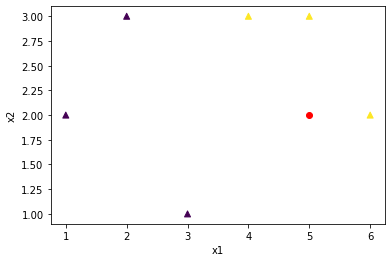

In [5]:
colors = [int(y[0] % 3) for y in y_train]

plt.scatter(x1 , x2 , c = colors , marker = '^')
plt.scatter(x_test[0][0] , x_test[0][1] , c = 'red')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

#Tensorflow Eager

위 Data를 기준으로 가설의 검증을 통해 Logistic Classification 모델을 만들도록 하겠습니다.

- Tensorflow data API를 통해 학습시킬 값들을 담는다.(Batch Size는 한번에 학습시킬 Size로 정한다.)

- features,labels는 실재 학습에 쓰일 Data (연산을 위해 Type을 맞춘다.)

In [6]:
dataset = tf.data.Dataset.from_tensor_slices((x_train , y_train)).batch(len(x_train)) #.repeat()

위 Data를 기준으로 가설의 검증을 통해  Logistic Classification 모델을 만들도록 하겠습니다.

- W와 b --> 학습을 통해 생성되는 모델에 쓰이는 Weight와 Bias (초기값을 variable : 0 이나 Random 값으로 가능 tf.random_normal([2,1]))

In [7]:
W = tf.Variable(tf.zeros([2 , 1]) , name = 'weight')
b = tf.Variable(tf.zeros([1]) , name = 'bias')

Sigmoid 함수를 가설로 선언합니다.

- sigmoid는 0.5를 기준으로 0 과 1 만의 값을 리턴, tf.sigmoid(tf.matmul(X , W) + b) --> 아래 sigmoid 그래프 참고

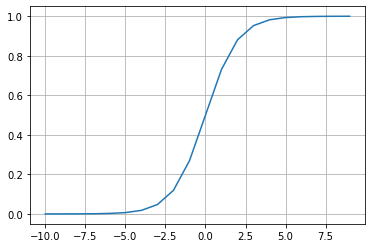

In [8]:
sigx_list =  list(range(-10 , 10))
sigy_list = list()
for x in sigx_list:
  sigmoid_x = tf.sigmoid(float(x))
  sigy_list.append(sigmoid_x)

plt.plot(sigx_list , sigy_list)
plt.grid()
plt.show()

In [9]:
def logistic_regression(features):
  hypothesis = tf.divide(1. , 1. + tf.exp(tf.matmul(features , W) + b))
  return hypothesis

가설을 검증할 Cost 함수를 정의

$cost(h(x),y)$

In [16]:
def loss_fn(hypothesis , features , labels):
  cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
  return cost
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

추론값은 sigmoid 함수에 따라 0.5를 기준으로 0과 1의 값을 리턴

- Sigmoid 함수를 통해 예측값이 0.5 보다 크면 1을 반환하고, 작으면 0을 반환

- 가설을 통해 실재 값과 비교한 정확도를 측정

In [12]:
def accuracy_fn(hypothesis , labels):
  predicted = tf.cast(hypothesis > 0.5 , dtype = tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype = tf.float32))
  return accuracy

Gradient Tape을 통해 경사값을 계산

In [13]:
def grad(features , labels):
  with tf.GradientTape() as tape:
    loss_value = loss_fn(logistic_regression(features) , features , labels)
  return tape.gradient(loss_value , [W , b])

학습 실행

- 위의 Data를 Cost 함수를 통해 학습시킨 후 모델을 생성

- 새로운 Data를 통한 검증 수행 [5 , 2]의 Data로 테스트 수행 ( 그래프상 1이 나와야 정상)

In [17]:
EPOCHS = 1001

for step in range(EPOCHS):
  for features , labels in iter(dataset):
    grads = grad(features , labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W ,b]))
    if step % 100 == 0 :
      print("Iter : {} , Loss : {:.4f}".format(step , loss_fn(logistic_regression(features) , features , labels)))
test_acc = accuracy_fn(logistic_regression(x_test) , y_test)
print("Testset Accuracy : {:.4f}".format(test_acc))

Iter : 0 , Loss : 0.6874
Iter : 100 , Loss : 0.5776
Iter : 200 , Loss : 0.5349
Iter : 300 , Loss : 0.5054
Iter : 400 , Loss : 0.4838
Iter : 500 , Loss : 0.4671
Iter : 600 , Loss : 0.4535
Iter : 700 , Loss : 0.4420
Iter : 800 , Loss : 0.4319
Iter : 900 , Loss : 0.4228
Iter : 1000 , Loss : 0.4144
Testset Accuracy : 1.0000
